<a href="https://colab.research.google.com/github/predicthq/phq-data-science-docs/blob/master/features-api/features-api.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Features API

The Features API provides features for ML Models across all types of demand causal factors, including attended events and non-attended events.

It allows you to go straight to feature-importance testing and improving your models rather than having to worry about first building a data lake and then aggregating the data. 

Features API is new and features will be expanded and added to over time. The endpoint currently supports:

* PHQ Attendance features (for attendance based events)
* PHQ Rank features (for scheduled, non-attendance based events)
* PHQ Viewership features (for viewership based events)

This notebook will guide you through how to use the Features API.
- [Setup](#setup)
- [Getting Started](#getting-started)
- [PHQ Attendance](#phq-attendance)
- [PHQ Rank](#phq-rank)
- [Academic Events](#academic-events)
- [Wide Data ranges](#wide-data-ranges)
- [Exploring the data](#exploring-the-data)
- [Concert trends for San Francisco vs Oakland](#concert)
- [Exploring TV Viewership with the Feature API](#tv-viewership)
- [Retrieving Multiple Locations](#multiple-locations)
- [List of lat/lon](#lat-lon)
- [Multiple Categories](#multiple-categories)

<a id='setup'></a>
# Setup

If using Google Colab uncomment the following code blocks.

In [1]:
# !pip install ipython ipykernel --upgrade

In [2]:
# %%capture
# !git clone https://github.com/predicthq/phq-data-science-docs.git
# %cd phq-data-science-docs/features-api
# !pip install aiohttp==3.7.4.post0 asyncio==3.4.3 backoff==1.10.0 bleach==3.3.0 calmap==0.0.9 iso8601==0.1.14 matplotlib==3.4.2 numpy==1.20.3 pandas==1.2.4 seaborn==0.11.1 uvloop==0.15.2

In [3]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

### Requirements
If running locally, configure the required dependencies in your Python environment by using the [requirements.txt](https://github.com/predicthq/phq-data-science-docs/blob/master/features-api/requirements.txt) file which is shared alongside the notebook.

These requirements can be installed by running the command `pip install -r requirements.txt`


In [4]:
import requests
import json

<a id='getting-started'></a>
## Getting Started

### Access Token

You will need an access token that has the `events` scope. The following link will guide you through setting up an access token: [https://docs.predicthq.com/guides/quickstart/](https://docs.predicthq.com/guides/quickstart/)

### Basic Concepts

Every request to the API must specify which features are needed. Throughout the notebook you will become familiar with the naming convention for features, and we will talk about features by name.

Each request must specify a date range and location (that applies to all features in that request).

Certain groups of features support additional filtering/parameters.

Results are at the daily level.

Each request can currently fetch up to 90 days worth - for longer date ranges, multiple requests must be made and we have some examples of how to do that in this notebook. There is no pagination in this API.

In [5]:
# Paste your access token here
ACCESS_TOKEN = '<TOKEN>'

headers = {
    'Content-Type': 'application/json',
    'Accept': 'application/json',
    'Authorization': f'Bearer {ACCESS_TOKEN}'
}

url = 'https://api.predicthq.com/v1/features'

<a id='phq-attendance'></a>
## PHQ Attendance

This group of features is based on PHQ Attendance. The following features are supported:

- `phq_attendance_sports`
- `phq_attendance_conferences`
- `phq_attendance_expos`
- `phq_attendance_concerts`
- `phq_attendance_festivals`
- `phq_attendance_performing_arts`
- `phq_attendance_community`
- `phq_attendance_academic_graduation`
- `phq_attendance_academic_social`

Each of these features includes stats. You define which stats you need (or don't define any and receive the default set of stats). Supported stats are:

- `sum` (included in default set of stats)
- `count` (included in default set of stats)
- `min`
- `max`
- `avg`
- `median`
- `std_dev`

These features also support filtering by PHQ Rank as you'll see in the example below.

In [6]:
payload = {
    'active': { 
        'gte': '2019-11-28',
        'lte': '2019-11-30'
    },
    'location': {
        'place_id': [5224323, 5811704, 4887398]
    },
    'phq_attendance_concerts': True,
    'phq_attendance_sports': {
        'stats': ['count', 'std_dev', 'median'],
        'phq_rank': { 
            'gt': 50
        }    
    }
}

response = requests.request('POST', url, headers=headers, json=payload)

In [7]:
print(json.dumps(response.json(), indent=4))

{
    "results": [
        {
            "date": "2019-11-28",
            "phq_attendance_concerts": {
                "stats": {
                    "count": 4,
                    "sum": 1580
                }
            },
            "phq_attendance_sports": {
                "stats": {
                    "count": 0,
                    "median": 0.0,
                    "std_dev": null
                }
            }
        },
        {
            "date": "2019-11-29",
            "phq_attendance_concerts": {
                "stats": {
                    "count": 53,
                    "sum": 46090
                }
            },
            "phq_attendance_sports": {
                "stats": {
                    "count": 3,
                    "median": 18654.0,
                    "std_dev": 6343.987407161383
                }
            }
        },
        {
            "date": "2019-11-30",
            "phq_attendance_concerts": {
                "stats": {
        

### Example with a lat/lon

The location filter supports Place IDs and lat/lon with a radius.

In [8]:
payload = {
    'active': { 
        'gte': '2019-11-28', 
        'lte': '2019-11-30' 
    },
    'location': {
        'geo': {
            'lat': 47.62064,
            'lon': -117.40401,
            'radius': '50km'
        }
    },
    'phq_attendance_concerts': True,
    'phq_attendance_sports': {
        'stats': ['count', 'std_dev', 'median'],
        'phq_rank': { 
            'gt': 50
        }    
    }
}

response = requests.request('POST', url, headers=headers, json=payload)

In [9]:
print(json.dumps(response.json(), indent=4))

{
    "results": [
        {
            "date": "2019-11-28",
            "phq_attendance_concerts": {
                "stats": {
                    "count": 0,
                    "sum": 0
                }
            },
            "phq_attendance_sports": {
                "stats": {
                    "count": 0,
                    "median": 0.0,
                    "std_dev": null
                }
            }
        },
        {
            "date": "2019-11-29",
            "phq_attendance_concerts": {
                "stats": {
                    "count": 0,
                    "sum": 0
                }
            },
            "phq_attendance_sports": {
                "stats": {
                    "count": 1,
                    "median": 7063.0,
                    "std_dev": 0.0
                }
            }
        },
        {
            "date": "2019-11-30",
            "phq_attendance_concerts": {
                "stats": {
                    "count": 1,

<a id='phq-rank'></a>
## PHQ Rank

This group of features is based on PHQ Rank for non-attendance based events (mostly scheduled non-attendance based). The following features are supported:

- `phq_rank_public_holidays`
- `phq_rank_school_holidays`
- `phq_rank_observances`
- `phq_rank_politics`
- `phq_rank_daylight_savings`
- `phq_rank_health_warnings`
- `phq_rank_academic_session`
- `phq_rank_academic_exam`
- `phq_rank_academic_holiday`

Results are broken down by PHQ Rank Level (1 to 5). Rank Levels are groupings of Rank and are grouped as follows:

- 1 = between 0 and 20
- 2 = between 21 and 40
- 3 = between 41 and 60
- 4 = between 61 and 80
- 5 = between 81 and 100

Additional filtering for PHQ Rank features is not currently supported.

In [10]:
payload = {
    'active': { 
        'gte': '2019-11-28', 
        'lte': '2019-11-30' 
    },
    'location': {
        'place_id': [5224323, 5811704, 4887398]
    },
    'phq_rank_school_holidays': True,
    'phq_rank_public_holidays': True,
    'phq_rank_health_warnings': True
}

response = requests.request('POST', url, headers=headers, json=payload)

In [11]:
print(json.dumps(response.json(), indent=4))

{
    "results": [
        {
            "date": "2019-11-28",
            "phq_rank_health_warnings": {
                "rank_levels": {
                    "1": 0,
                    "2": 0,
                    "3": 0,
                    "4": 0,
                    "5": 0
                }
            },
            "phq_rank_public_holidays": {
                "rank_levels": {
                    "1": 0,
                    "2": 0,
                    "3": 0,
                    "4": 0,
                    "5": 1
                }
            },
            "phq_rank_school_holidays": {
                "rank_levels": {
                    "1": 0,
                    "2": 7,
                    "3": 123,
                    "4": 58,
                    "5": 3
                }
            }
        },
        {
            "date": "2019-11-29",
            "phq_rank_health_warnings": {
                "rank_levels": {
                    "1": 0,
                    "2": 0,
        

## Academic Events

Academic events are slightly different in that they contain both attended and non-attended events. You may have noted above that there are features in PHQ Attendance and PHQ Rank for academic events.

There are 5 different academic types - namely:

- `graduation`
- `social`
- `academic-session`
- `exam`
- `holiday`

The types `graduation` and `social` are attendance based events which (as noted earlier) means we have the following PHQ Attendance features:

- `phq_attendance_academic_graduation`
- `phq_attendance_academic_social`

The types `academic-session`, `exam` and `holiday` are non-attendace based events which means we have the following PHQ Rank features:

- `phq_rank_academic_session`
- `phq_rank_academic_exam`
- `phq_rank_academic_holiday`

<a id='wide-data-ranges'></a>
# Wide Date Ranges

As mentioned earlier, the API currently supports a date range of up to 90 days. In order to fetch data across a wider range, multiple requests must be made. Here is an example using asyncio that fetches a few years worth of data in parallel.

There are a few functions we'll define first.

In [12]:
import asyncio
import aiohttp
import uvloop
import iso8601  
import backoff
from datetime import timedelta

In [13]:
asyncio.set_event_loop(uvloop.new_event_loop())

In [14]:
query = {
    'location': {
        'place_id': [5391959]  # 5391959 = San Francisco
    },
    'phq_attendance_concerts': {
        'stats': ['count', 'std_dev', 'median', 'avg'],
        'phq_rank': {
            'gt': 60
        }
    },
    'phq_attendance_sports': {
        'stats': ['count', 'std_dev', 'median'],
        'phq_rank': {
            'gt': 50
        }
    },
    'phq_attendance_community': {
        'stats': ['count', 'std_dev', 'median'],
        'phq_rank': {
            'gt': 50
        }
    },
    'phq_attendance_conferences': {
        'stats': ['count', 'std_dev', 'median'],
        'phq_rank': {
            'gt': 50
        }
    },
    'phq_rank_public_holidays': True,
    'phq_attendance_academic_graduation': True
}

In [15]:
format_date = lambda x: x.strftime('%Y-%m-%d')
parse_date = lambda x: iso8601.parse_date(x)

# The API has rate limits so failed requests should be retried automatically
@backoff.on_exception(backoff.expo, (aiohttp.ClientError), max_time=60)
async def get(
    session: aiohttp.ClientSession,
    query: dict,
    start: str,
    end: str,
    **kwargs ) -> dict:
    
    payload = {
        'active': {
            'gte': start,
            'lte': end
        },
        **query
    }

    resp = await session.request('POST', url=url, headers=headers, raise_for_status=True, json=payload, **kwargs)
    data = await resp.json()
    return data

In [16]:
async def gather_with_concurrency(n, *tasks):
    semaphore = asyncio.Semaphore(n)

    async def sem_task(task):
        async with semaphore:
            return await task
    
    return await asyncio.gather(*(sem_task(task) for task in tasks))


async def gather_stats(query: dict, start_date: str, end_date: str, **kwargs):
    date_ranges = []
    start_date = parse_date(start_date)
    end_date = parse_date(end_date)
    start_ref = start_date
    
    while start_ref + timedelta(days=90) < end_date:
        date_ranges.append({'start': format_date(start_ref), 
                            'end': format_date(start_ref + timedelta(days=90))})
        start_ref = start_ref + timedelta(days=91)
    
    date_ranges.append({'start': format_date(start_ref), 
                        'end': format_date(end_date)})
    
    async with aiohttp.ClientSession() as session:
        tasks = []
        for date_range in date_ranges:
            tasks.append(
                get(
                    session=session,
                    query=query,
                    start=date_range['start'],
                    end=date_range['end'], **kwargs))
        
        responses = await gather_with_concurrency(5, *tasks)
        results = []
        
        for response in responses:
            results.extend(response['results'])
        
        return results

If using Google Colab uncomment the following code block to fix broken async functionality.

This is as a result of how Google implemented notebooks and are running their async event loop.
Google Colab's Tornado 5.0 (Currently running 5.1.x) update bricked asyncio functionalities after the addition of its own asyncio event loop.

Thus, for any asyncio functionality to run on Google Colab Notebook you cannot invoke a `run_until_complete()` or `await`, since the loop you will receive from `asyncio.get_event_loop()` will be active and throw the exception seen.
JupterHub/JupyterLab had the same issue but have since fixed this, which is why you can easily just `await` the resolution, processing and response of an async call with the await keyword.

So we need to `"monkey patch"` the running event loop on Google Colab to hijack the event loop to allow us to issue tasks to be scheduled!

In [17]:
if IN_COLAB:
    import asyncio
    import nest_asyncio
    nest_asyncio.apply()


    def awaitx(x): return asyncio.get_event_loop().run_until_complete(x)

    responses = awaitx(gather_stats(
        query=query,
        start_date='2016-01-01',
        end_date='2021-12-31'))

    len(responses)
else:
    responses = await gather_stats(
        query=query,
        start_date='2016-01-01',
        end_date='2021-12-31')

    len(responses)


In [18]:
print(json.dumps(responses[0], indent=4))

{
    "date": "2016-01-01",
    "phq_attendance_academic_graduation": {
        "stats": {
            "count": 0,
            "sum": 0
        }
    },
    "phq_attendance_community": {
        "stats": {
            "count": 0,
            "median": 0.0,
            "std_dev": null
        }
    },
    "phq_attendance_concerts": {
        "stats": {
            "count": 2,
            "avg": 5000.0,
            "median": 5000.0,
            "std_dev": 0.0
        }
    },
    "phq_attendance_conferences": {
        "stats": {
            "count": 0,
            "median": 0.0,
            "std_dev": null
        }
    },
    "phq_attendance_sports": {
        "stats": {
            "count": 0,
            "median": 0.0,
            "std_dev": null
        }
    },
    "phq_rank_public_holidays": {
        "rank_levels": {
            "1": 0,
            "2": 0,
            "3": 0,
            "4": 0,
            "5": 1
        }
    }
}


<a id='exploring-the-data'></a>
# Exploring the Data


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import calmap
import warnings

# To display more columns and with a larger width in the DataFrame
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100

<a id='concert'></a>
## Concert Trends for San Francisco vs Oakland

In [20]:
# IDs are from https://www.geonames.org/
sf_id = 5391959
oak_id = 5378538

# San Francisco
query = {
    'location': {
        'place_id': [sf_id]
    },
    'phq_attendance_concerts': {
        'stats': ['count', 'sum', 'median']
    },
    'phq_attendance_festivals': {
        'stats': ['count', 'sum', 'median']
    }
}

In [21]:
if IN_COLAB:
    import asyncio
    import nest_asyncio
    nest_asyncio.apply()


    def awaitx(x): return asyncio.get_event_loop().run_until_complete(x)
    sf_responses = awaitx(gather_stats(
        query=query,
        start_date='2016-01-01',
        end_date='2021-04-01'))
else:
    sf_responses = await gather_stats(
    query=query,
    start_date='2016-01-01',
    end_date='2021-04-01')

In [22]:
# Oakland
query = {
    'location': {
        'place_id': [oak_id]
    },
    'phq_attendance_concerts': {'stats': ['count', 'sum', 'median'], },
    'phq_attendance_festivals': {'stats': ['count', 'sum', 'median'], },
}

In [23]:
if IN_COLAB:
    import asyncio
    import nest_asyncio
    nest_asyncio.apply()


    def awaitx(x): return asyncio.get_event_loop().run_until_complete(x)
    oak_responses = awaitx(gather_stats(
        query=query,
        start_date='2016-01-01',
        end_date='2021-04-01'))
else:
    oak_responses = await gather_stats(
    query=query,
    start_date='2016-01-01',
    end_date='2021-04-01')

In [24]:
sf_df = pd.DataFrame.from_dict(sf_responses)
oak_df = pd.DataFrame.from_dict(oak_responses)

sf_df.head()

,date,phq_attendance_concerts,phq_attendance_festivals
0,2016-01-01,"{'stats': {'count': 16, 'sum': 21014, 'median': 800.0}}","{'stats': {'count': 3, 'sum': 99, 'median': 33.0}}"
1,2016-01-02,"{'stats': {'count': 6, 'sum': 5800, 'median': 850.0}}","{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}"
2,2016-01-03,"{'stats': {'count': 4, 'sum': 2750, 'median': 750.0}}","{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}"
3,2016-01-04,"{'stats': {'count': 2, 'sum': 750, 'median': 375.0}}","{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}"
4,2016-01-05,"{'stats': {'count': 1, 'sum': 22, 'median': 22.0}}","{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}"


Reshaping the responses into tabular form

In [25]:
FIELDS = ['sum', 'count', 'median']

def parse_element(response: dict, fields: list) -> np.array:
    """
    Extracts the feature fields from a dictionary into an array
    """
    blank_response = np.zeros(shape=(len(fields)))
    if isinstance(response, dict):
        if not 'stats' in response: return blank_response
        stats = response['stats']
        if stats['count'] == 0: return blank_response
        return np.array([stats[field] for field in fields])
    
def add_flat_features(df: pd.DataFrame, column: str, 
                      feature_name: str, fields: list) -> pd.DataFrame:
    """
    Adds features into dataframe
    """
    list_feature = df[column].apply(parse_element, fields=fields)
    fts = pd.DataFrame(list_feature.to_list(), columns=fields)
    fts.columns = [f'{feature_name}_{col}' for col in fts.columns]
    return df.join(fts)

In [26]:
sf_flat = add_flat_features(sf_df, 'phq_attendance_concerts', 'concerts', fields=FIELDS)
sf_flat = add_flat_features(sf_flat, 'phq_attendance_festivals', 'festivals', fields=FIELDS)

oak_flat = add_flat_features(oak_df, 'phq_attendance_concerts', 'concerts', fields=FIELDS)
oak_flat = add_flat_features(oak_flat, 'phq_attendance_festivals', 'festivals', fields=FIELDS)

sf_flat['date'] = pd.to_datetime(sf_flat['date'])
oak_flat['date'] = pd.to_datetime(oak_flat['date'])

In [27]:
sf_flat.head(2)

,date,phq_attendance_concerts,phq_attendance_festivals,concerts_sum,concerts_count,concerts_median,festivals_sum,festivals_count,festivals_median
0,2016-01-01,"{'stats': {'count': 16, 'sum': 21014, 'median': 800.0}}","{'stats': {'count': 3, 'sum': 99, 'median': 33.0}}",21014.0,16.0,800.0,99.0,3.0,33.0
1,2016-01-02,"{'stats': {'count': 6, 'sum': 5800, 'median': 850.0}}","{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}",5800.0,6.0,850.0,0.0,0.0,0.0


In [28]:
oak_flat.head(2)

,date,phq_attendance_concerts,phq_attendance_festivals,concerts_sum,concerts_count,concerts_median,festivals_sum,festivals_count,festivals_median
0,2016-01-01,"{'stats': {'count': 3, 'sum': 960, 'median': 310.0}}","{'stats': {'count': 1, 'sum': 62, 'median': 62.0}}",960.0,3.0,310.0,62.0,1.0,62.0
1,2016-01-02,"{'stats': {'count': 3, 'sum': 1510, 'median': 600.0}}","{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}",1510.0,3.0,600.0,0.0,0.0,0.0


In [29]:
def truncate_to_month(date_col):
    return date_col - pd.Timedelta('1 day') * (date_col.dt.day - 1)

sf_flat['month'] = truncate_to_month(sf_flat['date'])
oak_flat['month'] = truncate_to_month(oak_flat['date'])

In [30]:
agg_dict = {'concerts_sum': 'sum',
            'concerts_count': 'sum',
            'concerts_median': 'median',
            'festivals_sum': 'sum',
            'festivals_count': 'sum',
            'festivals_median': 'median',}

sf_monthly = (sf_flat
 .groupby('month')
 .agg(agg_dict)
)

oak_monthly = (oak_flat
 .groupby('month')
 .agg(agg_dict)
)
sf_monthly.columns = [f'{col}_sf' for col in sf_monthly.columns]
oak_monthly.columns = [f'{col}_oak' for col in oak_monthly.columns]

both_monthly = sf_monthly.join(oak_monthly).reset_index()
both_monthly.head()

,month,concerts_sum_sf,concerts_count_sf,concerts_median_sf,festivals_sum_sf,festivals_count_sf,festivals_median_sf,concerts_sum_oak,concerts_count_oak,concerts_median_oak,festivals_sum_oak,festivals_count_oak,festivals_median_oak
0,2016-01-01,233337.0,323.0,375.0,29103.0,44.0,22.00,102543.0,103.0,310.00,774.0,7.0,0.0
1,2016-02-01,275935.0,363.0,450.0,1009031.0,35.0,22.00,257130.0,110.0,250.00,91825.0,28.0,22.0
2,2016-03-01,230481.0,416.0,400.0,164422.0,44.0,21.50,146317.0,112.0,250.00,21573.0,24.0,0.0
3,2016-04-01,256451.0,471.0,350.0,414690.0,74.0,51.75,118181.0,163.0,175.75,3207.0,53.0,22.0
4,2016-05-01,222867.0,504.0,250.0,510332.0,65.0,39.00,123175.0,165.0,140.00,43676.0,45.0,17.0


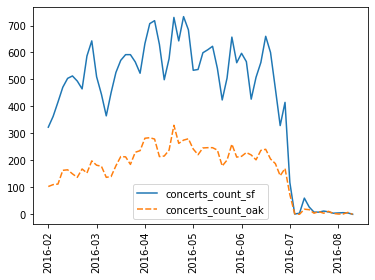

In [31]:
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots()
    both_monthly['month'] = pd.to_datetime(both_monthly['month'])
    sns.lineplot(data=both_monthly[['month', 'concerts_count_sf', 
                                    'concerts_count_oak']], ax=ax)

    ax.set_xticklabels(both_monthly['month'].dt.strftime('%Y-%m'))
    ticks = [item.get_text() for item in ax.get_xticklabels()]

    plt.xticks(rotation=90);

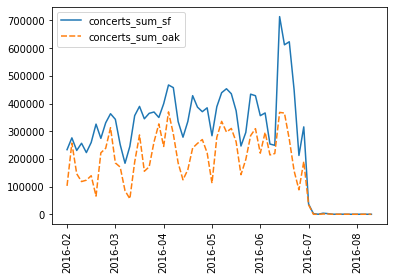

In [32]:
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots()

    sns.lineplot(data=both_monthly[['month', 'concerts_sum_sf', 
                                    'concerts_sum_oak']], ax=ax)
    # plt.xticks(both_monthly['month'])
    ax.set_xticklabels(both_monthly['month'].dt.strftime('%Y-%m'))
    plt.xticks(rotation=90);

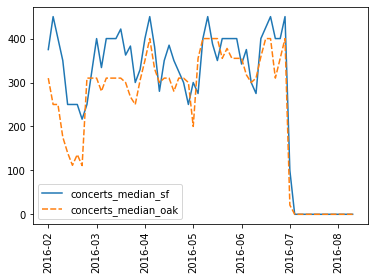

In [33]:
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots()

    sns.lineplot(data=both_monthly[['month', 'concerts_median_sf', 
                                    'concerts_median_oak']], ax=ax)
    # plt.xticks(both_monthly['month'])
    ax.set_xticklabels(both_monthly['month'].dt.strftime('%Y-%m'))
    plt.xticks(rotation=90);

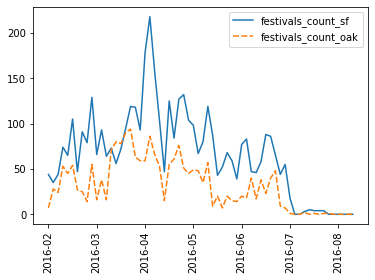

In [34]:
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots()

    sns.lineplot(data=both_monthly[['month', 'festivals_count_sf', 
                                    'festivals_count_oak']], ax=ax)
    # plt.xticks(both_monthly['month'])
    ax.set_xticklabels(both_monthly['month'].dt.strftime('%Y-%m'))
    plt.xticks(rotation=90);

<a id='tv-viewership'></a>
## Exploring TV Viewership with the Features API

This group of features is based on PHQ Viewership. The following features are some examples that are supported:

- `phq_viewership_sports_american_football` (viewership across all supported American Football leagues)
- `phq_viewership_sports_american_football_nfl` (viewership for NFL)
- `phq_viewership_sports_baseball` (viewership across all supported Baseball leagues)
- `phq_viewership_sports_soccer_mls` (viewership for MLS)
- `phq_viewership_sports_basketball` (viewership across all supported Basketball leagues)
- `phq_viewership_sports_basketball_nba` (viewership for NBA)
- `phq_viewership_sports_ice_hockey_nhl` (viewership for NHL)

The full list of available viewership feature fields are in our documentation [here](https://docs.predicthq.com/resources/features/#viewership-based-feature-fields).

For this section we will demonstrate how to apply the Features API to explore the viewership for two different sports. For one example we will be comparing viewership for all supported American Football leagues in San Francisco against viewership for all supported American Football leagues in Oakland. The second example we will be comparing viewership for all supported Basketball leagues in San Francisco against viewership for all supported Basketball leagues in Oakland.

In [35]:
# San Francisco
query = {
    'location': {
        'place_id': [sf_id]
    },
    'phq_viewership_sports_american_football': {
        'stats': ['count', 'sum', 'median'],
    },
    'phq_viewership_sports_basketball': {
        'stats': ['count', 'sum', 'median'], 
    },
}

In [36]:
if IN_COLAB:
    import asyncio
    import nest_asyncio
    nest_asyncio.apply()


    def awaitx(x): return asyncio.get_event_loop().run_until_complete(x)
    sf_responses = awaitx(gather_stats(
        query=query,
        start_date='2020-01-01',
        end_date='2020-12-31'))
else:
    sf_responses = await gather_stats(
    query=query,
    start_date='2020-01-01',
    end_date='2020-12-31')

In [37]:
sf_df = pd.DataFrame.from_dict(sf_responses)
sf_df.head()

,date,phq_viewership_sports_american_football,phq_viewership_sports_basketball
0,2020-01-01,"{'stats': {'count': 3, 'sum': 60652, 'median': 18609.0}}","{'stats': {'count': 7, 'sum': 13790, 'median': 1200.0}}"
1,2020-01-02,"{'stats': {'count': 1, 'sum': 18222, 'median': 18222.0}}","{'stats': {'count': 18, 'sum': 37464, 'median': 1228.0}}"
2,2020-01-03,"{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}","{'stats': {'count': 10, 'sum': 22748, 'median': 1414.5}}"
3,2020-01-04,"{'stats': {'count': 2, 'sum': 121007, 'median': 60503.5}}","{'stats': {'count': 38, 'sum': 62163, 'median': 1201.0}}"
4,2020-01-05,"{'stats': {'count': 2, 'sum': 128513, 'median': 64256.5}}","{'stats': {'count': 13, 'sum': 24198, 'median': 1239.0}}"


In [38]:
# Oakland
query = {
    'location': {
        'place_id': [oak_id]
    },
    'phq_viewership_sports_american_football': {
        'stats': ['count', 'sum', 'median'], 
    },
    'phq_viewership_sports_basketball': {
        'stats': ['count', 'sum', 'median'], 
    },
}

If running on Google Colab uncomment the following block to obtain results.

In [39]:
if IN_COLAB:
    import asyncio
    import nest_asyncio
    nest_asyncio.apply()


    def awaitx(x): return asyncio.get_event_loop().run_until_complete(x)
    oak_responses = awaitx(gather_stats(
        query=query,
        start_date='2020-01-01',
        end_date='2020-12-31'))
else:
    oak_responses = await gather_stats(
    query=query,
    start_date='2020-01-01',
    end_date='2020-12-31')

In [40]:
oak_df = pd.DataFrame.from_dict(oak_responses)
oak_df.head()

,date,phq_viewership_sports_american_football,phq_viewership_sports_basketball
0,2020-01-01,"{'stats': {'count': 3, 'sum': 114989, 'median': 35281.0}}","{'stats': {'count': 7, 'sum': 26143, 'median': 2275.0}}"
1,2020-01-02,"{'stats': {'count': 1, 'sum': 34547, 'median': 34547.0}}","{'stats': {'count': 18, 'sum': 71019, 'median': 2327.5}}"
2,2020-01-03,"{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}","{'stats': {'count': 10, 'sum': 43124, 'median': 2682.0}}"
3,2020-01-04,"{'stats': {'count': 2, 'sum': 229416, 'median': 114708.0}}","{'stats': {'count': 38, 'sum': 118526, 'median': 2276.5}}"
4,2020-01-05,"{'stats': {'count': 2, 'sum': 243647, 'median': 121823.5}}","{'stats': {'count': 13, 'sum': 45869, 'median': 2348.0}}"


In [41]:
sf_view_flat = add_flat_features(sf_df, 'phq_viewership_sports_american_football', 'american_football', fields=FIELDS)
sf_view_flat = add_flat_features(sf_view_flat, 'phq_viewership_sports_basketball', 'basketball', fields=FIELDS)

oak_view_flat = add_flat_features(oak_df, 'phq_viewership_sports_american_football', 'american_football', fields=FIELDS)
oak_view_flat = add_flat_features(oak_view_flat, 'phq_viewership_sports_basketball', 'basketball', fields=FIELDS)

sf_view_flat['date'] = pd.to_datetime(sf_view_flat['date'])
oak_view_flat['date'] = pd.to_datetime(oak_view_flat['date'])

In [42]:
sf_view_flat['month'] = truncate_to_month(sf_view_flat['date'])
oak_view_flat['month'] = truncate_to_month(oak_view_flat['date'])

In [43]:
sf_view_flat.head()

,date,phq_viewership_sports_american_football,phq_viewership_sports_basketball,american_football_sum,american_football_count,american_football_median,basketball_sum,basketball_count,basketball_median,month
0,2020-01-01,"{'stats': {'count': 3, 'sum': 60652, 'median': 18609.0}}","{'stats': {'count': 7, 'sum': 13790, 'median': 1200.0}}",60652.0,3.0,18609.0,13790.0,7.0,1200.0,2020-01-01
1,2020-01-02,"{'stats': {'count': 1, 'sum': 18222, 'median': 18222.0}}","{'stats': {'count': 18, 'sum': 37464, 'median': 1228.0}}",18222.0,1.0,18222.0,37464.0,18.0,1228.0,2020-01-01
2,2020-01-03,"{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}","{'stats': {'count': 10, 'sum': 22748, 'median': 1414.5}}",0.0,0.0,0.0,22748.0,10.0,1414.5,2020-01-01
3,2020-01-04,"{'stats': {'count': 2, 'sum': 121007, 'median': 60503.5}}","{'stats': {'count': 38, 'sum': 62163, 'median': 1201.0}}",121007.0,2.0,60503.5,62163.0,38.0,1201.0,2020-01-01
4,2020-01-05,"{'stats': {'count': 2, 'sum': 128513, 'median': 64256.5}}","{'stats': {'count': 13, 'sum': 24198, 'median': 1239.0}}",128513.0,2.0,64256.5,24198.0,13.0,1239.0,2020-01-01


In [44]:
oak_view_flat.head()

,date,phq_viewership_sports_american_football,phq_viewership_sports_basketball,american_football_sum,american_football_count,american_football_median,basketball_sum,basketball_count,basketball_median,month
0,2020-01-01,"{'stats': {'count': 3, 'sum': 114989, 'median': 35281.0}}","{'stats': {'count': 7, 'sum': 26143, 'median': 2275.0}}",114989.0,3.0,35281.0,26143.0,7.0,2275.0,2020-01-01
1,2020-01-02,"{'stats': {'count': 1, 'sum': 34547, 'median': 34547.0}}","{'stats': {'count': 18, 'sum': 71019, 'median': 2327.5}}",34547.0,1.0,34547.0,71019.0,18.0,2327.5,2020-01-01
2,2020-01-03,"{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}","{'stats': {'count': 10, 'sum': 43124, 'median': 2682.0}}",0.0,0.0,0.0,43124.0,10.0,2682.0,2020-01-01
3,2020-01-04,"{'stats': {'count': 2, 'sum': 229416, 'median': 114708.0}}","{'stats': {'count': 38, 'sum': 118526, 'median': 2276.5}}",229416.0,2.0,114708.0,118526.0,38.0,2276.5,2020-01-01
4,2020-01-05,"{'stats': {'count': 2, 'sum': 243647, 'median': 121823.5}}","{'stats': {'count': 13, 'sum': 45869, 'median': 2348.0}}",243647.0,2.0,121823.5,45869.0,13.0,2348.0,2020-01-01


Reshaping the responses into tabular form

In [45]:
agg_dict = {'american_football_sum': 'sum',
            'american_football_count': 'sum',
            'american_football_median': 'median',
            'basketball_sum': 'sum',
            'basketball_count': 'sum',
            'basketball_median': 'median',}

sf_monthly = (sf_view_flat
 .groupby('month')
 .agg(agg_dict)
)

oak_monthly = (oak_view_flat
 .groupby('month')
 .agg(agg_dict)
)
sf_monthly.columns = [f'{col}_sf' for col in sf_monthly.columns]
oak_monthly.columns = [f'{col}_oak' for col in oak_monthly.columns]

both_monthly = sf_monthly.join(oak_monthly).reset_index()
both_monthly.head()

,month,american_football_sum_sf,american_football_count_sf,american_football_median_sf,basketball_sum_sf,basketball_count_sf,basketball_median_sf,american_football_sum_oak,american_football_count_oak,american_football_median_oak,basketball_sum_oak,basketball_count_oak,basketball_median_oak
0,2020-01-01,946608.0,16.0,0.0,983731.0,518.0,1238.0,1794671.0,16.0,0.0,1872122.0,518.0,2347.0
1,2020-02-01,259590.0,1.0,0.0,1084972.0,529.0,1587.5,492157.0,1.0,0.0,2063088.0,529.0,3009.5
2,2020-03-01,0.0,0.0,0.0,519452.0,156.0,0.0,0.0,0.0,0.0,988057.0,156.0,0.0
3,2020-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The results of viewership between San Francisco and Oakland for All American Football are graphed below.

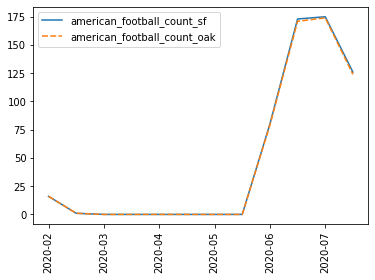

In [46]:
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots()
    both_monthly['month'] = pd.to_datetime(both_monthly['month'])
    sns.lineplot(data=both_monthly[['month', 'american_football_count_sf', 
                                    'american_football_count_oak']], ax=ax)

    ax.set_xticklabels(both_monthly['month'].dt.strftime('%Y-%m'))
    ticks = [item.get_text() for item in ax.get_xticklabels()]

    plt.xticks(rotation=90);

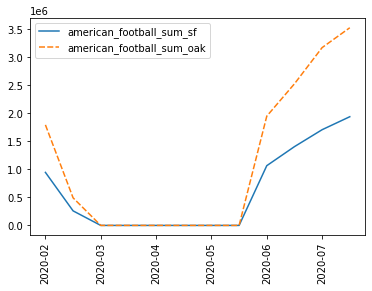

In [47]:
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots()
    both_monthly['month'] = pd.to_datetime(both_monthly['month'])
    sns.lineplot(data=both_monthly[['month', 'american_football_sum_sf', 
                                    'american_football_sum_oak']], ax=ax)

    ax.set_xticklabels(both_monthly['month'].dt.strftime('%Y-%m'))
    ticks = [item.get_text() for item in ax.get_xticklabels()]

    plt.xticks(rotation=90);

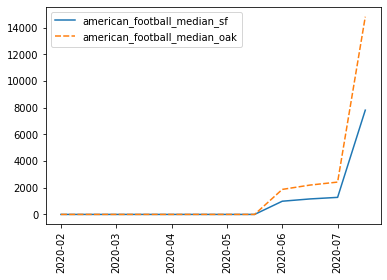

In [48]:
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots()
    both_monthly['month'] = pd.to_datetime(both_monthly['month'])
    sns.lineplot(data=both_monthly[['month', 'american_football_median_sf', 
                                    'american_football_median_oak']], ax=ax)

    ax.set_xticklabels(both_monthly['month'].dt.strftime('%Y-%m'))
    ticks = [item.get_text() for item in ax.get_xticklabels()]

    plt.xticks(rotation=90);

The results for viewership between San Francisco and Oakland for All Basketball are graphed below.

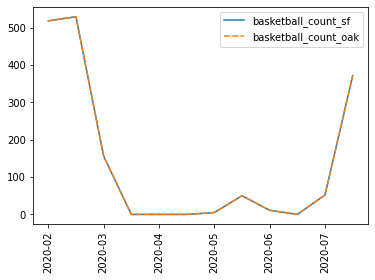

In [49]:
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots()
    both_monthly['month'] = pd.to_datetime(both_monthly['month'])
    sns.lineplot(data=both_monthly[['month', 'basketball_count_sf', 
                                    'basketball_count_oak']], ax=ax)

    ax.set_xticklabels(both_monthly['month'].dt.strftime('%Y-%m'))
    ticks = [item.get_text() for item in ax.get_xticklabels()]

    plt.xticks(rotation=90);

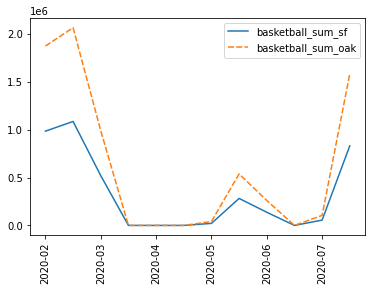

In [50]:
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots()
    both_monthly['month'] = pd.to_datetime(both_monthly['month'])
    sns.lineplot(data=both_monthly[['month', 'basketball_sum_sf', 
                                    'basketball_sum_oak']], ax=ax)

    ax.set_xticklabels(both_monthly['month'].dt.strftime('%Y-%m'))
    ticks = [item.get_text() for item in ax.get_xticklabels()]

    plt.xticks(rotation=90);

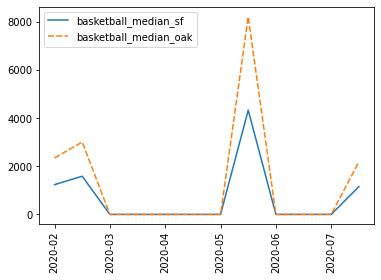

In [51]:
with warnings.catch_warnings():
    
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots()
    both_monthly['month'] = pd.to_datetime(both_monthly['month'])
    sns.lineplot(data=both_monthly[['month', 'basketball_median_sf', 
                                    'basketball_median_oak']], ax=ax)

    ax.set_xticklabels(both_monthly['month'].dt.strftime('%Y-%m'))
    ticks = [item.get_text() for item in ax.get_xticklabels()]

    plt.xticks(rotation=90);

<a id='multiple-locations'></a>
### Retrieving Multiple Locations

You can specify multiple locations in a single request and the results for all specified locations will be aggregated together as in the example below.

In [52]:
query = {
    'location': {
        'place_id': [sf_id, oak_id]
    },
    'phq_attendance_concerts': {
        'stats': ['count', 'sum', 'median']
    },
    'phq_attendance_festivals': {
        'stats': ['count', 'sum', 'median']
    }
}

In [53]:
if IN_COLAB:
    import asyncio
    import nest_asyncio
    nest_asyncio.apply()


    def awaitx(x): return asyncio.get_event_loop().run_until_complete(x)
    both_responses = awaitx(gather_stats(
        query=query,
        start_date='2016-01-01',
        end_date='2021-04-01'))
else:
    both_responses = await gather_stats(
    query=query,
    start_date='2016-01-01',
    end_date='2021-04-01')

In [54]:
pd.DataFrame.from_dict(both_responses).head(5)


,date,phq_attendance_concerts,phq_attendance_festivals
0,2016-01-01,"{'stats': {'count': 19, 'sum': 21974, 'median': 600.0}}","{'stats': {'count': 4, 'sum': 161, 'median': 33.0}}"
1,2016-01-02,"{'stats': {'count': 9, 'sum': 7310, 'median': 600.0}}","{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}"
2,2016-01-03,"{'stats': {'count': 5, 'sum': 3350, 'median': 700.0}}","{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}"
3,2016-01-04,"{'stats': {'count': 2, 'sum': 750, 'median': 375.0}}","{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}"
4,2016-01-05,"{'stats': {'count': 2, 'sum': 332, 'median': 166.0}}","{'stats': {'count': 0, 'sum': 0, 'median': 0.0}}"


<a id='lat-lon'></a>
## List of lat/lon

You might need to fetch data for a wide date range as well as a large number of different locations. This example loads a list of lat/lon from a CSV file and fetches data for each of them.

In [55]:
examples = pd.read_csv('./data/lat_lon_examples.csv').sample(50)

examples.head(5)

,City,Latitude,Longitude
60,"Sioux Falls, South Dakota, the US",43.536388,-96.731667
232,"Quincy, MA, USA",42.255459,-71.002579
15,"Tyler, TX, USA",32.349998,-95.300003
216,"Dublin, CA, USA",37.702152,-121.935791
489,"Ann Arbor, MI, the US",42.279594,-83.732124


In [56]:
# Check number of locations
len(examples)

50

In [57]:
query_f = lambda lat, long: {
    'location': {
        'geo': {
            'lat': float(lat),
            'lon': float(long),
            'radius': '10km'
        }
    },
    'phq_attendance_sports': {
        'stats': ['count', 'avg'],
        'phq_rank': { 
            'gt': 50
        }    
    },
    "phq_attendance_concerts": {
        'stats': ['count', 'avg'],
        'phq_rank': { 
            'gt': 50
        }    
    },
}

async def pull_one_lat_long(city, lat, long):
    response = await gather_stats(
        query=query_f(lat, long),
        start_date='2016-01-01',
        end_date='2021-04-01')
    return {city: response}

In [58]:
import time

start_time = time.time()

all_locations = []

for ix , row in examples.iterrows():
    all_locations += [pull_one_lat_long(row['City'], 
                                        row['Latitude'], 
                                        row['Longitude'])]

In [59]:
if IN_COLAB:
    import asyncio
    import nest_asyncio
    nest_asyncio.apply()


    def awaitx(x): return asyncio.get_event_loop().run_until_complete(x)
    # This might take a few seconds
    all_results = awaitx(gather_with_concurrency(5, *all_locations))
else:
    # This might take a few seconds
    all_results = await gather_with_concurrency(5, *all_locations)

In [60]:
end_time = time.time()
taken = (time.time() - start_time)
print(f"{taken}s processing time")

20.029061317443848s processing time


In [61]:
features_list = [
    "phq_attendance_sports",
    "phq_attendance_concerts"
]

all_counts = [val[key]['stats']['count'] for place_data in all_results
                for place_name, data in place_data.items() for val in data for key in features_list]
print(
    f"Features analysed for {sum(all_counts)} events across 21 quarters or ~1920 days for 2 different categories ")


Features analysed for 24235 events across 21 quarters or ~1920 days for 2 different categories 


In [62]:
FIELDS = ['count', 'avg']
all_locs = []
for city in all_results:
    one_loc = pd.DataFrame(list(city.values())[0])
    one_loc = add_flat_features(one_loc, 'phq_attendance_sports', 
                                 'sports', FIELDS)
    one_loc.drop(['phq_attendance_sports'],
                 axis=1, inplace=True)
    one_loc['City'] = list(city.keys())[0]
    all_locs.append(one_loc)
cities = pd.concat(all_locs)

In [63]:
cities.pivot_table(index='date', columns='City', values='sports_avg')

City,"Albany, NY, USA","Anderson, Texas, the US","Ann Arbor, MI, the US","Baton Rouge, LA, USA","Brick, NJ, USA","Brighton, IL, USA","Canton, OH, USA","Cartersville, GA, USA","Cary, NC, USA","Columbus, GA, USA","Cooper City, FL, USA","Dublin, CA, USA","East Point, GA, USA","Elk Grove, CA, USA","Fall River, MA, USA","Federal Way, WA, USA","Gilroy, CA, USA","Glenwood Springs, CO, USA","Grifton, NC, USA","Hanford, CA, US","Kenosha, WI, USA","Kent, WA, USA","Lafayette, IN, USA","Lakewood, CO, USA","Levittown, NY, USA","Massillon, Ohio, the US","Meridian, ID, USA","Miramar, FL, USA","Moreno Valley, CA, USA","New Orleans, LA, USA","Novato, CA, USA","Pensacola, FL, USA","Quincy, MA, USA","Redmond, WA, USA","Rio Rancho, New Mexico, USA","Rochester Hills, MI, USA","Salinas, CA, USA","Salt Lake City, UH, USA","San Angelo, TX, USA","San Marcos, TX, USA","Sioux Falls, South Dakota, the US","Southfield, MI, USA","Sparks, NV, USA","Stuart, FL, USA","Tempe, AZ, USA","Tyler, TX, USA","Visalia, CA, USA","Walnut, CA, USA","Westland, MI, USA","Wilmington, NC, USA"
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19520.0,0.0,0.0,0.0,0.0,0.0,54837.0,0.0,1804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-02,15959.0,0.0,8240.666667,0.0,0.0,0.0,0.0,0.0,12149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14846.0,18087.0,0.0,0.0,0.0,0.0,0.0,2243.0,0.0,1813.0,0.0,0.0,0.0,4000.0,0.0,11947.0,0.0,0.0,3539.0,0.0,7863.0,0.0,5028.0,0.0,0.0,0.0,0.0,3823.0
2016-01-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5181.0,44004.0,0.0,0.0,0.0,65326.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3641.0,0.0,0.0,0.0,11013.0,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8448.5,0.0,11419.5,0.0,0.0,0.0,2376.0,6022.0,0.0,3747.0,0.0,0.0,0.0,0.0,0.0
2016-01-05,0.0,0.0,0.000000,13573.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15082.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2193.0,0.0,0.0,0.0,1406.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1631.0,0.0,0.0,0.0,0.0,0.0
2021-03-29,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5546.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-30,0.0,0.0,0.000000,25580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999.0,0.0,0.0,0.0,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='multiple-categories'></a>
## Multiple Categories

For San Francisco

In [64]:
FIELDS = ['sum', 'count']
query = {
    'location': {
        'place_id': [sf_id]
    },
    'phq_attendance_concerts': {
        'stats': FIELDS
    },
    'phq_attendance_community': {
        'stats': FIELDS
    },
    'phq_attendance_conferences': {
        'stats': FIELDS
    },
    'phq_attendance_expos': {
        'stats': FIELDS
    },
    'phq_attendance_performing_arts': {
        'stats': FIELDS
    },
    'phq_attendance_sports': {
        'stats': FIELDS
    },
    'phq_attendance_festivals': {
        'stats': FIELDS
    },
    'phq_rank_public_holidays': True, 
    'phq_rank_school_holidays': True, 
    'phq_rank_observances': True
}

In [65]:
if IN_COLAB:
    import asyncio
    import nest_asyncio
    nest_asyncio.apply()


    def awaitx(x): return asyncio.get_event_loop().run_until_complete(x)
    sf_mlt_responses = awaitx(gather_stats(
        query=query,
        start_date='2016-01-01',
        end_date='2021-04-01'))
else:
    sf_mlt_responses = await gather_stats(
    query=query,
    start_date='2016-01-01',
    end_date='2021-04-01')


Parse Rank Columns

In [66]:
def parse_rank_column(col):
    rank_levels = col.apply(lambda x: x['rank_levels'])
    max_values = []
    for row in rank_levels:
        not_null = {k: v for k, v in row.items() if v>0}
        if not_null:
            max_values.append(int(max(not_null)))
        else:
            # all values were zero
            max_values.append(0)            
    return max_values

In [67]:
holidays_att = pd.DataFrame.from_dict(sf_mlt_responses)
holidays_att['public-holiday'] = \
     parse_rank_column(holidays_att['phq_rank_public_holidays'])
holidays_att['public-holiday'] = \
     parse_rank_column(holidays_att['phq_rank_public_holidays'])
holidats_pa = add_flat_features(holidays_att, 'phq_attendance_performing_arts', 
                  'performing_arts', FIELDS)
holidats_pa = add_flat_features(holidats_pa, 'phq_attendance_concerts', 
                  'concerts', FIELDS)
holidats_pa = add_flat_features(holidats_pa, 'phq_attendance_community', 
                  'community', FIELDS)
holidats_pa = add_flat_features(holidats_pa, 'phq_attendance_conferences', 
                  'conferences', FIELDS)
holidats_pa = add_flat_features(holidats_pa, 'phq_attendance_expos', 
                  'expos', FIELDS)
holidats_pa = add_flat_features(holidats_pa, 'phq_attendance_festivals', 
                  'festivals', FIELDS)
holidats_pa = add_flat_features(holidats_pa, 'phq_attendance_sports', 
                  'sports', FIELDS)
holidats_pa.set_index('date', inplace=True)
holidats_pa.index = pd.to_datetime(holidats_pa.index)

In [68]:
(holidats_pa
    .groupby('public-holiday')
    .agg({'conferences_sum': 'median',
          'community_sum': 'median',
          'conferences_count': 'median',
          'community_count': 'median',
         }
        )
)

,conferences_sum,community_sum,conferences_count,community_count
public-holiday,,,,
0,1500.0,1985.0,4.0,16.0
4,726.0,3125.5,3.0,17.5
5,0.0,1117.0,0.0,10.0


Visualize in a Calendar

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


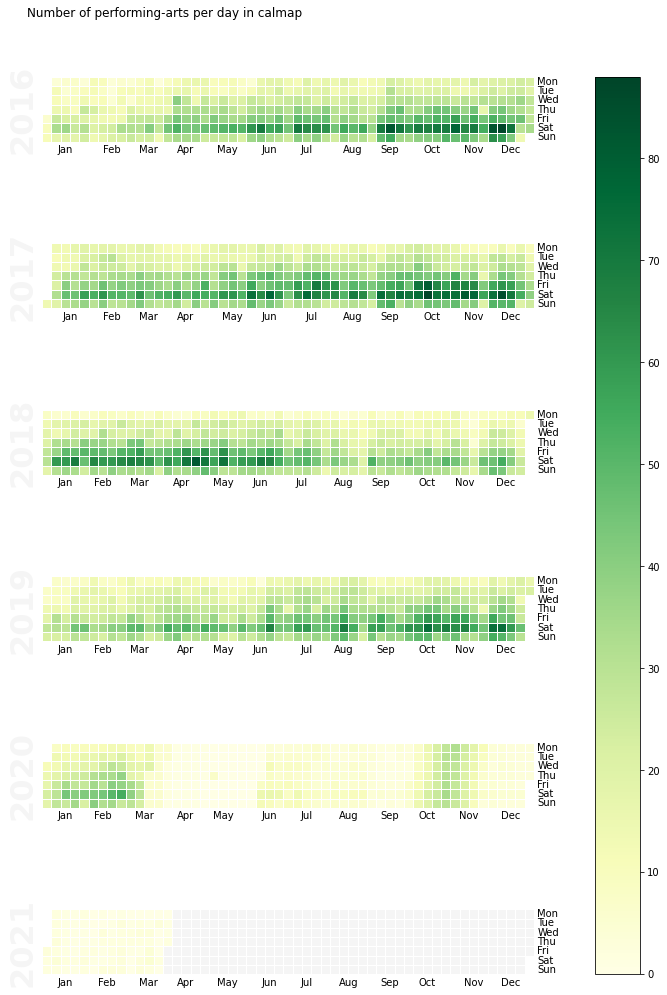

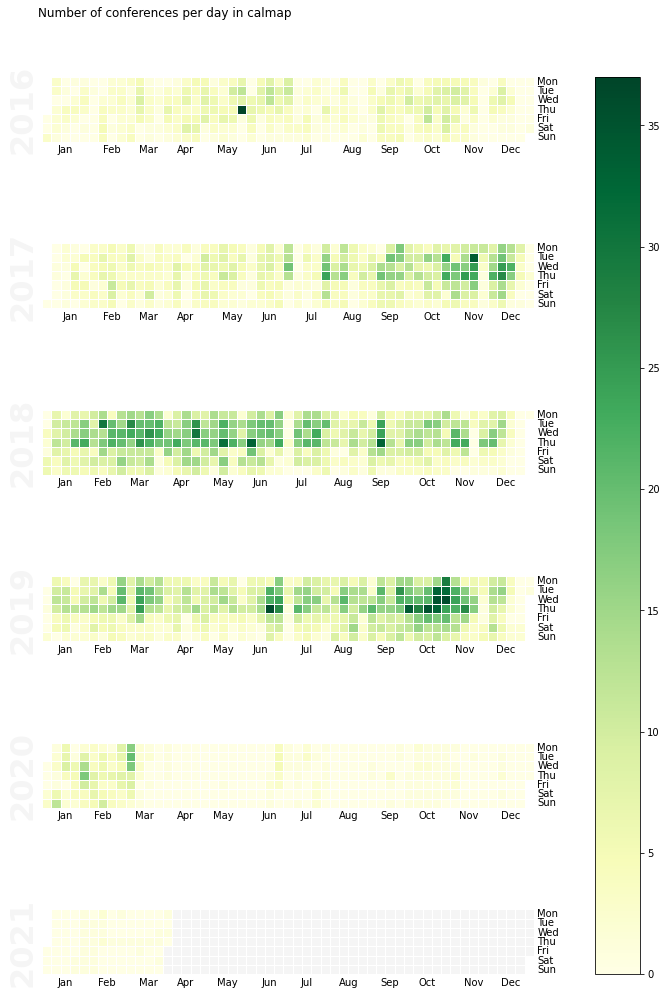

In [69]:
for category in ['performing-arts', 'conferences']:
    feature = category.replace('-','_')+'_count'
    fig, ax = calmap.calendarplot(holidats_pa[feature], cmap="YlGn")
    fig.set_size_inches(18, 15)
    fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())
    _ = fig.suptitle(f"Number of {category} per day in calmap")
